# Name: Neeraj Bapat
# Sparks Foundation Internship
# Task II:
## Prediction using Supervised ML

In [5]:
### Importing libraries ###
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Importing

In [16]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Pre-processing

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [18]:
# There are two columns with 25 rows and all the values are numerical

## Univariate Analysis

In [20]:
data.describe() #looks at some statistical information about a dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Identification and Treatment of Outliers

<AxesSubplot:>

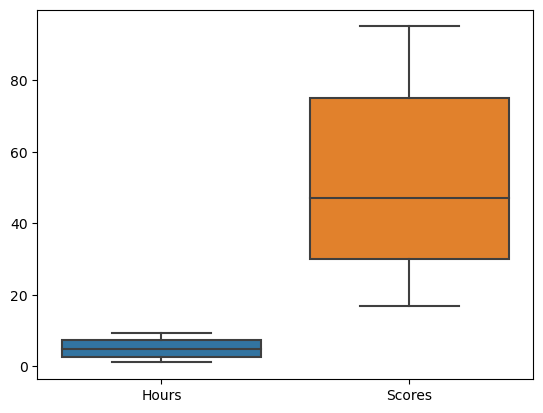

In [21]:
sns.boxplot(data=data)

In [22]:
# There are no outlers present in the dataset

### Missing Values 

In [25]:
data.isna().sum() # to identify if missing values are present

Hours     0
Scores    0
dtype: int64

In [24]:
# There are no missing or null values in the dataset

## Bi-Variate Analysis

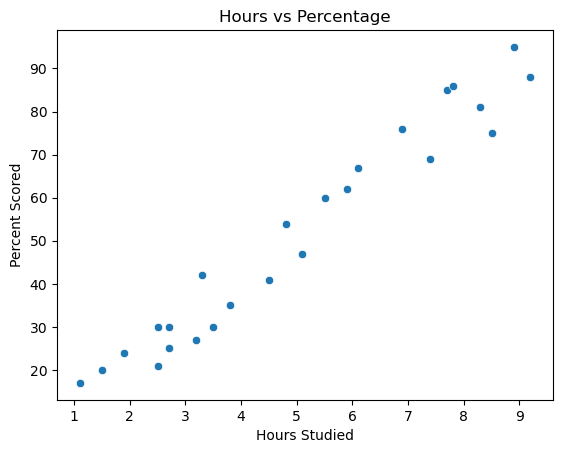

In [38]:
sns.scatterplot(x='Hours', y='Scores',data=data) # Plotting of scatterplot for identification if data is linear
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percent Scored')  
plt.show()

In [28]:
# In this, we can see that the 'Scores', which is our Y variable is positively correlated with 'Hours' which is X variable

### Correlation Matrix

In [29]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

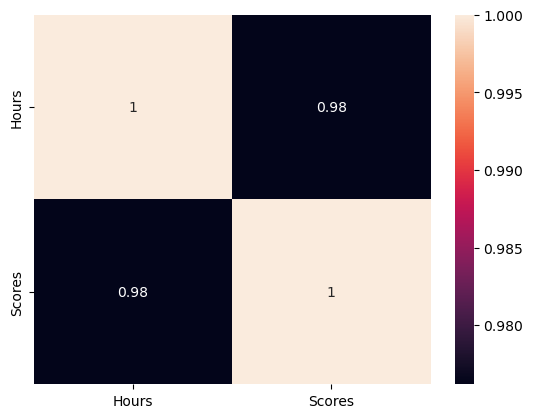

In [31]:
sns.heatmap(data.corr(), annot = True)

#### From above result, we can say that 'Scores' have 98% Strong positive correlation with 'Hours'

## Data Partition

In [32]:
x=data[['Hours']]
y=data[['Scores']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,train_size=0.7,random_state=10)

In [33]:
train = pd.concat([X_train,y_train], axis=1)
train.head()

,Hours,Scores
11,5.9,62
22,3.8,35
3,8.5,75
23,6.9,76
6,9.2,88


## Model Building

### Hypotheis Testing

- H0 : There is no relationship between the Hours & Scores
                     Vs
- H1 : There is relationship between the Hours & Scores

Alpha =5% ( 0.05 )

In [39]:
import statsmodels.formula.api as smf
model = smf.ols('Scores ~ Hours', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           9.13e-17
Time:                        20:23:17   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion
- We Reject Ho.
- There is relationship between the Scores & Hours
- Accuracy of Model is 95.3%, So Model is Good Fit
- Y = 2.4837 + 9.7758 * Hours

# Predicting on Train data

In [40]:
train['fitted_value'] = model.fittedvalues # prediction
train['residual'] = model.resid  # error

train.head()

,Hours,Scores,fitted_value,residual
11,5.9,62,60.160913,1.839087
22,3.8,35,39.631726,-4.631726
3,8.5,75,85.578002,-10.578002
23,6.9,76,69.936717,6.063283
6,9.2,88,92.421065,-4.421065


# Prediction on Test data 

In [41]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Hours,Scores
5,1.5,20
1,5.1,47
13,3.3,42
2,3.2,27
12,4.5,41


In [42]:
test['Predicted']=model.predict(test)
test

,Hours,Scores,Predicted
5,1.5,20,17.147378
1,5.1,47,52.340271
13,3.3,42,34.743825
2,3.2,27,33.766244
12,4.5,41,46.474789
19,7.4,69,74.824618
14,1.1,17,13.237057
7,5.5,60,56.250592


## Accuracy on Test data

In [44]:
from sklearn.metrics import r2_score
r2 = r2_score(test.Scores, test.Predicted)
print('Accuracy for model Performance on Test', np.round(r2,2))

Accuracy for model Performance on Test 0.91


## Accuracy on Train data

In [48]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Scores, train.fitted_value)
print('Accuracy for perfect model on train is', np.round(r2,2))

Accuracy for perfect model on train is 0.96


## Model is good fit & Performance on Test  and Train data is also good fit

# What will be predicted score if a student studies for 9.25 hrs/ day?

In [50]:
d1 = {'Hours':pd.Series([9.25])}
live = pd.DataFrame(d1)
live

,Hours
0,9.25


In [51]:
live['future Prediction']=np.round(model.predict(live))
live

,Hours,future Prediction
0,9.25,93.0


## Through the model it is predicted that, if a student studies for 9.25 hrs/ day , their scores will be 93.0%. 

# Thank you

# Finish